# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

x = datetime.datetime.now()

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))
lat_lngs

[(35.04937369529452, 3.141292892344694),
 (4.589727026401363, -138.33465027227336),
 (15.097187752776307, -174.7219173221489),
 (31.71209183887551, 166.53229747250725),
 (-80.41511038431123, 40.61981533641966),
 (-18.840166260191722, -74.0357758827632),
 (57.62729163298195, -127.74681502677504),
 (-79.86889169207646, -47.264073370415275),
 (35.64101047440059, 75.47516994282535),
 (63.63585224946817, -49.57972224508387),
 (-42.82055786142165, 161.35796888450705),
 (53.21929317731292, 72.5071901433165),
 (83.27997042138693, -141.28630973301466),
 (45.44707753565575, -139.80320330218223),
 (-65.82024461186873, -110.46228928910188),
 (1.2002120097585163, -52.58147261583545),
 (-70.42900235926932, -23.281619751312746),
 (-3.0573757419858225, -27.49576011381052),
 (34.82021228883953, -173.64569864134634),
 (15.207038581154677, 149.4567078619989),
 (20.652836432820834, 32.00181349554953),
 (58.68569652328222, 142.24589874774102),
 (-10.16563410796364, -149.66793660999554),
 (84.02479802849632

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-9.000, high=9.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

486

In [5]:
cities

['atuona',
 'nibong tebal',
 'conceicao do araguaia',
 'bengkulu',
 'puerto ayora',
 'san isidro',
 'saleaula',
 'canutama',
 'terra santa',
 'butaritari',
 'ijaki',
 'ugoofaaru',
 'jacareacanga',
 'samusu',
 'negara',
 'georgetown',
 'lagunas',
 'asau',
 'banjar',
 'tabou',
 'el alto',
 'carutapera',
 'kieta',
 'vaitupu',
 'sao filipe',
 'goderich',
 'maracacume',
 'jamestown',
 'candido mendes',
 'sorong',
 'hambantota',
 'kapaa',
 'rungata',
 'domoni',
 'ayame',
 'bonthe',
 'rantepao',
 'san patricio',
 'pemangkat',
 'bukama',
 'kudat',
 'meulaboh',
 'gelemso',
 'luanda',
 'accra',
 'hobyo',
 'buala',
 'maua',
 'surubim',
 'faanui',
 'victoria',
 'kasongo-lunda',
 'altamira',
 'hithadhoo',
 'hilo',
 'soyo',
 'namatanai',
 'calabar',
 'olinda',
 'lorengau',
 'tual',
 'kuzhithurai',
 'lata',
 'kota tinggi',
 'matara',
 'lolua',
 'makokou',
 'amapa',
 'salinas',
 'sao raimundo das mangabeiras',
 'igurubi',
 'airai',
 'otukpo',
 'ambilobe',
 'sai buri',
 'pringsewu',
 'manadhoo',
 'vani

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=230e737308d3c9c6ca07da88dc7a6eec&units=metric&q='

In [7]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 0

print(f"Beginning Data Retrieval\n-------------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        record = record + 1
        print(f"Processing Record {record} | {city_record}")

    except KeyError:
        print("City not found. Skipping...")

print(f"-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Atuona
Processing Record 2 | Nibong Tebal
Processing Record 3 | Conceicao do Araguaia
City not found. Skipping...
Processing Record 4 | Puerto Ayora
Processing Record 5 | San Isidro
City not found. Skipping...
Processing Record 6 | Canutama
Processing Record 7 | Terra Santa
Processing Record 8 | Butaritari
City not found. Skipping...
Processing Record 9 | Ugoofaaru
Processing Record 10 | Jacareacanga
City not found. Skipping...
Processing Record 11 | Negara
Processing Record 12 | Georgetown
Processing Record 13 | Lagunas
City not found. Skipping...
Processing Record 14 | Banjar
Processing Record 15 | Tabou
Processing Record 16 | El Alto
Processing Record 17 | Carutapera
Processing Record 18 | Kieta
City not found. Skipping...
Processing Record 19 | Sao Filipe
Processing Record 20 | Goderich
Processing Record 21 | Maracacume
Processing Record 22 | Jamestown
Processing Record 23 | Candido Mendes
Processing Rec

Processing Record 231 | Kabanjahe
City not found. Skipping...
Processing Record 232 | Ikorodu
Processing Record 233 | Kribi
Processing Record 234 | Jamame
Processing Record 235 | Jerantut
City not found. Skipping...
Processing Record 236 | Vicencia
Processing Record 237 | Chachapoyas
City not found. Skipping...
Processing Record 238 | Kulhudhuffushi
Processing Record 239 | Saquena
Processing Record 240 | Orocue
Processing Record 241 | Singaraja
Processing Record 242 | Yabassi
Processing Record 243 | Gambela
Processing Record 244 | Nicoya
Processing Record 245 | Kavaratti
Processing Record 246 | Muisne
Processing Record 247 | Mattru
Processing Record 248 | Tucurui
Processing Record 249 | Carmen de Apicala
Processing Record 250 | Vegachi
Processing Record 251 | Moyobamba
Processing Record 252 | Aripuana
Processing Record 253 | Eten
Processing Record 254 | Cantanhede
Processing Record 255 | Batouri
Processing Record 256 | Inirida
Processing Record 257 | San Lorenzo
Processing Record 258 |

In [8]:
data_df = pd.DataFrame(list(zip(city_name, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed)), 
               columns =['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Win Speed']) 
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Win Speed
0,Atuona,5,PF,1563426863,70,-9.80,-139.03,27.04,4.26
1,Nibong Tebal,75,MY,1563426863,70,5.17,100.48,31.00,4.10
2,Conceicao do Araguaia,0,BR,1563426864,46,-8.26,-49.26,21.74,0.67
3,Puerto Ayora,38,EC,1563426864,94,-0.74,-90.35,20.00,1.34
4,San Isidro,77,CR,1563426864,69,10.02,-84.06,23.00,3.60


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Output File (CSV)
export_csv = data_df.to_csv (r'export_dataframe.csv', index = None, header=True)

In [10]:
data_df.count()

City          434
Cloudiness    434
Country       434
Date          434
Humidity      434
Lat           434
Lng           434
Max Temp      434
Win Speed     434
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [11]:
# The maximum x value for our chart will be 85
x_limit = 85

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(0, x_limit, 1)

In [12]:
#x = datetime.datetime.now()
#date = print(x.strftime("%x"))
#date

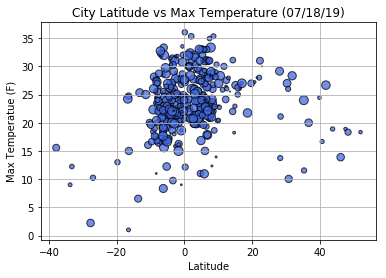

In [13]:
plt.scatter(lat, max_temp, marker="o", facecolors="royalblue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("City Latitude vs Max Temperature " + "(" + x.strftime("%x") + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperatue (F)")
plt.grid()
plt.show
plt.savefig("latitude_maxtemp.png")

#### Latitude vs. Humidity Plot

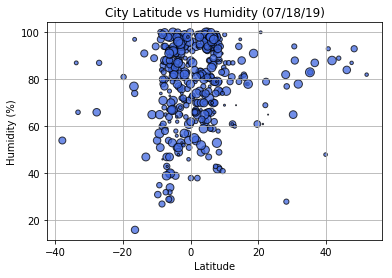

In [14]:
plt.scatter(lat, humidity, marker="o", facecolors="royalblue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("City Latitude vs Humidity " + "(" + x.strftime("%x") + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show
plt.savefig("latitude_humidity.png")

#### Latitude vs. Cloudiness Plot

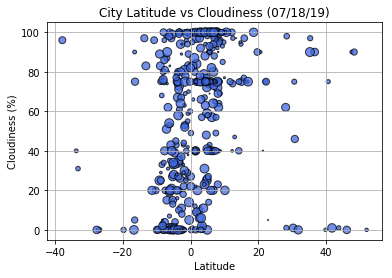

In [15]:
plt.scatter(lat, cloudiness, marker="o", facecolors="royalblue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("City Latitude vs Cloudiness " + "(" + x.strftime("%x") + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show
plt.savefig("latitude_cloudiness.png")

#### Latitude vs. Wind Speed Plot

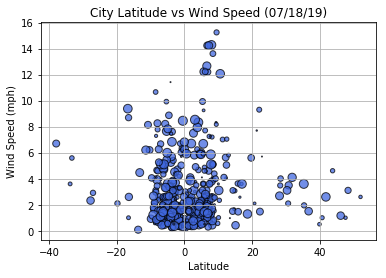

In [16]:
plt.scatter(lat, wind_speed, marker="o", facecolors="royalblue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("City Latitude vs Wind Speed " + "(" + x.strftime("%x") + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show
plt.savefig("latitude_windspeed.png")

According to the results obtained in the charts, we can conclude:
* Temperature is higher in the cities closer to the Equator.
* Cloudiness can be higher as well as lower in the cities closer to the Equator.
* The cities closer to the Equator are less windy than the rest of the cities.